In [ ]:
pip install  sentence_transformers

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/sample_data/SYRCityline_Requests_(2021-Present).csv')

df

,X,Y,Id,Summary,Rating,Address,Description,Agency_Name,Request_type,URL,...,Created_at_local,Acknowledged_at_local,Closed_at_local,Minutes_to_acknowledged,Minutes_to_closed,Assignee_name,Category,Sla_in_hours,Report_Source,ObjectId
0,-8.476958e+06,5.319783e+06,10139153,Potholes,2,"101 Ny-5 Syracuse NY 13204, United States",Pothole entering lot 3 parking lot,"Streets, Sidewalks & Transportation",33843,https://crm.seeclickfix.com/#/organizations/15...,...,06/15/2021 - 02:36PM,NaN,07/08/2021 - 11:15AM,NaN,32918.0,Superintendent of Street Repair,Potholes,120.0,iPhone,1
1,-8.476284e+06,5.318202e+06,10139656,This content has been blocked.,1,"1031 S Mcbride St Syracuse, NY, 13202, USA",This content is currently blocked. The content...,"Streets, Sidewalks & Transportation",33843,https://crm.seeclickfix.com/#/organizations/15...,...,06/15/2021 - 03:38PM,NaN,06/30/2021 - 04:14PM,NaN,NaN,Superintendent of Street Repair,Potholes,120.0,Web - Mobile,2
2,-8.476538e+06,5.312523e+06,10139931,Large/Bulk Items,3,"306 Ferndale Dr Syracuse, NY, 13205, USA",Box Frame & Metal bed frame,"Garbage, Recycling & Graffiti",33854,https://crm.seeclickfix.com/#/organizations/15...,...,06/15/2021 - 04:15PM,NaN,07/28/2021 - 09:27AM,NaN,61511.0,Department of Public Works- DC,Large or Bulk Items- Setout notification only,48.0,Portal,3
3,-8.476284e+06,5.318202e+06,10140818,Potholes,3,"1031 S Mcbride St Syracuse, NY, 13202, USA",Nimo dug right near light filled it but did a ...,"Streets, Sidewalks & Transportation",33843,https://crm.seeclickfix.com/#/organizations/15...,...,06/15/2021 - 07:01PM,NaN,07/08/2021 - 11:53AM,NaN,32692.0,Superintendent of Street Repair,Potholes,120.0,Web - Mobile,4
4,-8.473775e+06,5.316425e+06,10141504,Water-related Concerns,2,"326 Buckingham Ave Syracuse, NY, 13210, USA",meter is leaking,Water & Sewage,33849,https://crm.seeclickfix.com/#/organizations/15...,...,06/15/2021 - 10:20PM,NaN,06/22/2021 - 11:58PM,NaN,10177.0,NaN,Water-related Concerns,24.0,Portal,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68500,-8.475438e+06,5.322138e+06,15078033,Tree Care and Removal,2,"1036 Oak St Syracuse, NY, 13203, USA",Tree branches hanging low over sidewalk on sou...,"Green Spaces, Trees & Public Utilities",33856,https://crm.seeclickfix.com/#/organizations/15...,...,08/13/2023 - 02:16PM,08/14/2023 - 07:56AM,NaN,1060.0,NaN,Forestry - Parks,Tree Care and Removal,1344.0,iPhone,68501
68501,-8.473117e+06,5.320548e+06,15078040,Illegal Setouts,2,"1523 Burnet Ave Syracuse, NY 13206, USA",two family rental property and the tentant at...,"Garbage, Recycling & Graffiti",34425,https://crm.seeclickfix.com/#/organizations/15...,...,08/13/2023 - 02:17PM,08/14/2023 - 08:24AM,08/14/2023 - 05:50PM,1086.0,1652.0,Public Works Inspector- SP,Illegal Setouts,72.0,Android,68502
68502,-8.474541e+06,5.321536e+06,15078054,Sewer Back-ups (INTERNAL),2,"1401 James St Syracuse, New York, 13203",Jianni\n315-742-4566,Water & Sewage,35820,https://crm.seeclickfix.com/#/organizations/15...,...,08/13/2023 - 02:21PM,NaN,08/15/2023 - 06:56AM,NaN,2434.0,Jeffrey Kohanski,Sewer Back-ups (INTERNAL),24.0,Request Form,68503
68503,-8.480254e+06,5.317860e+06,15088551,Sewer-related Concerns,2,"Grand Ave & Burnet Park Ent Sout Syracuse, New...",SPD 315-435-8833- called stating kids took sew...,Water & Sewage,33840,https://crm.seeclickfix.com/#/organizations/15...,...,08/15/2023 - 03:03AM,NaN,08/15/2023 - 06:40AM,NaN,216.0,Assistant Superintendent of Sewers,Sewer-related Concerns,24.0,Request Form,68504


In [ ]:
df=df[df['Minutes_to_closed']<=20000]

In [ ]:
column_name = 'Description'
df = df.dropna(subset=[column_name])

# Reset the index of the DataFrame if needed
df.reset_index(drop=True, inplace=True)


In [ ]:
df

,X,Y,Id,Summary,Rating,Address,Description,Agency_Name,Request_type,URL,...,Created_at_local,Acknowledged_at_local,Closed_at_local,Minutes_to_acknowledged,Minutes_to_closed,Assignee_name,Category,Sla_in_hours,Report_Source,ObjectId
0,-8.473775e+06,5.316425e+06,10141504,Water-related Concerns,2,"326 Buckingham Ave Syracuse, NY, 13210, USA",meter is leaking,Water & Sewage,33849,https://crm.seeclickfix.com/#/organizations/15...,...,06/15/2021 - 10:20PM,NaN,06/22/2021 - 11:58PM,NaN,10177.0,NaN,Water-related Concerns,24.0,Portal,5
1,-8.478742e+06,5.319118e+06,10141789,Home & Building Maintenance,2,"801 W Fayette St Syracuse, NY, 13204, USA",Overgrowth,Housing & Property Maintenance,33847,https://crm.seeclickfix.com/#/organizations/15...,...,06/15/2021 - 11:29PM,NaN,06/16/2021 - 10:10AM,NaN,641.0,Director of Code Enforcement,Home & Building Maintenance,48.0,Portal,7
2,-8.478150e+06,5.319847e+06,10141807,Water-related Concerns,2,"121 Plum St Syracuse, NY, 13204, USA",Main Leak,Water & Sewage,33849,https://crm.seeclickfix.com/#/organizations/15...,...,06/15/2021 - 11:35PM,NaN,06/22/2021 - 11:57PM,NaN,10101.0,NaN,Water-related Concerns,24.0,Portal,10
3,-8.478384e+06,5.315091e+06,10141810,Water-related Concerns,2,"Craddock St & Hillview Ave Syracuse, NY, 13207...",a hit Hydrant,Water & Sewage,33849,https://crm.seeclickfix.com/#/organizations/15...,...,06/15/2021 - 11:37PM,NaN,06/16/2021 - 03:34PM,NaN,957.0,NaN,Water-related Concerns,24.0,Portal,11
4,-8.479346e+06,5.317646e+06,10149876,Home & Building Maintenance,2,"200-298 Fitch St Syracuse, NY, 13204, USA",Overgrowth on multiple properties on this bloc...,Housing & Property Maintenance,33847,https://crm.seeclickfix.com/#/organizations/15...,...,06/16/2021 - 10:52PM,NaN,06/17/2021 - 07:58AM,NaN,545.0,Division of Code Enforcement,Home & Building Maintenance,48.0,Portal,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50632,-8.477156e+06,5.319366e+06,15078030,Report Litter on Public Land,2,"301 S Salina St Syracuse NY 13202, United States",Corner of Bank Alley and W. Fayette. Needs cle...,"Garbage, Recycling & Graffiti",36372,https://crm.seeclickfix.com/#/organizations/15...,...,08/13/2023 - 02:15PM,08/14/2023 - 06:12AM,08/14/2023 - 01:05PM,957.0,1370.0,Superintendent of Environmental Services,Report Litter on Public Land,72.0,iPhone,68493
50633,-8.474510e+06,5.314734e+06,15088015,Sewer-related Concerns,2,"1437 Comstock Ave Syracuse, New York, 13210",Emergency UFPO\n1437 Comstock Ave\n315-329-165...,Water & Sewage,33840,https://crm.seeclickfix.com/#/organizations/15...,...,08/14/2023 - 09:42PM,NaN,08/15/2023 - 06:40AM,NaN,538.0,Assistant Superintendent of Sewers,Sewer-related Concerns,24.0,Request Form,68498
50634,-8.473117e+06,5.320548e+06,15078040,Illegal Setouts,2,"1523 Burnet Ave Syracuse, NY 13206, USA",two family rental property and the tentant at...,"Garbage, Recycling & Graffiti",34425,https://crm.seeclickfix.com/#/organizations/15...,...,08/13/2023 - 02:17PM,08/14/2023 - 08:24AM,08/14/2023 - 05:50PM,1086.0,1652.0,Public Works Inspector- SP,Illegal Setouts,72.0,Android,68502
50635,-8.474541e+06,5.321536e+06,15078054,Sewer Back-ups (INTERNAL),2,"1401 James St Syracuse, New York, 13203",Jianni\n315-742-4566,Water & Sewage,35820,https://crm.seeclickfix.com/#/organizations/15...,...,08/13/2023 - 02:21PM,NaN,08/15/2023 - 06:56AM,NaN,2434.0,Jeffrey Kohanski,Sewer Back-ups (INTERNAL),24.0,Request Form,68503


In [ ]:
df

,X,Y,Id,Summary,Rating,Address,Description,Agency_Name,Request_type,URL,...,Created_at_local,Acknowledged_at_local,Closed_at_local,Minutes_to_acknowledged,Minutes_to_closed,Assignee_name,Category,Sla_in_hours,Report_Source,ObjectId
0,-8.473775e+06,5.316425e+06,10141504,Water-related Concerns,2,"326 Buckingham Ave Syracuse, NY, 13210, USA",meter is leaking,Water & Sewage,33849,https://crm.seeclickfix.com/#/organizations/15...,...,06/15/2021 - 10:20PM,NaN,06/22/2021 - 11:58PM,NaN,10177.0,NaN,Water-related Concerns,24.0,Portal,5
1,-8.478742e+06,5.319118e+06,10141789,Home & Building Maintenance,2,"801 W Fayette St Syracuse, NY, 13204, USA",Overgrowth,Housing & Property Maintenance,33847,https://crm.seeclickfix.com/#/organizations/15...,...,06/15/2021 - 11:29PM,NaN,06/16/2021 - 10:10AM,NaN,641.0,Director of Code Enforcement,Home & Building Maintenance,48.0,Portal,7
2,-8.478150e+06,5.319847e+06,10141807,Water-related Concerns,2,"121 Plum St Syracuse, NY, 13204, USA",Main Leak,Water & Sewage,33849,https://crm.seeclickfix.com/#/organizations/15...,...,06/15/2021 - 11:35PM,NaN,06/22/2021 - 11:57PM,NaN,10101.0,NaN,Water-related Concerns,24.0,Portal,10
3,-8.478384e+06,5.315091e+06,10141810,Water-related Concerns,2,"Craddock St & Hillview Ave Syracuse, NY, 13207...",a hit Hydrant,Water & Sewage,33849,https://crm.seeclickfix.com/#/organizations/15...,...,06/15/2021 - 11:37PM,NaN,06/16/2021 - 03:34PM,NaN,957.0,NaN,Water-related Concerns,24.0,Portal,11
4,-8.479346e+06,5.317646e+06,10149876,Home & Building Maintenance,2,"200-298 Fitch St Syracuse, NY, 13204, USA",Overgrowth on multiple properties on this bloc...,Housing & Property Maintenance,33847,https://crm.seeclickfix.com/#/organizations/15...,...,06/16/2021 - 10:52PM,NaN,06/17/2021 - 07:58AM,NaN,545.0,Division of Code Enforcement,Home & Building Maintenance,48.0,Portal,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50632,-8.477156e+06,5.319366e+06,15078030,Report Litter on Public Land,2,"301 S Salina St Syracuse NY 13202, United States",Corner of Bank Alley and W. Fayette. Needs cle...,"Garbage, Recycling & Graffiti",36372,https://crm.seeclickfix.com/#/organizations/15...,...,08/13/2023 - 02:15PM,08/14/2023 - 06:12AM,08/14/2023 - 01:05PM,957.0,1370.0,Superintendent of Environmental Services,Report Litter on Public Land,72.0,iPhone,68493
50633,-8.474510e+06,5.314734e+06,15088015,Sewer-related Concerns,2,"1437 Comstock Ave Syracuse, New York, 13210",Emergency UFPO\n1437 Comstock Ave\n315-329-165...,Water & Sewage,33840,https://crm.seeclickfix.com/#/organizations/15...,...,08/14/2023 - 09:42PM,NaN,08/15/2023 - 06:40AM,NaN,538.0,Assistant Superintendent of Sewers,Sewer-related Concerns,24.0,Request Form,68498
50634,-8.473117e+06,5.320548e+06,15078040,Illegal Setouts,2,"1523 Burnet Ave Syracuse, NY 13206, USA",two family rental property and the tentant at...,"Garbage, Recycling & Graffiti",34425,https://crm.seeclickfix.com/#/organizations/15...,...,08/13/2023 - 02:17PM,08/14/2023 - 08:24AM,08/14/2023 - 05:50PM,1086.0,1652.0,Public Works Inspector- SP,Illegal Setouts,72.0,Android,68502
50635,-8.474541e+06,5.321536e+06,15078054,Sewer Back-ups (INTERNAL),2,"1401 James St Syracuse, New York, 13203",Jianni\n315-742-4566,Water & Sewage,35820,https://crm.seeclickfix.com/#/organizations/15...,...,08/13/2023 - 02:21PM,NaN,08/15/2023 - 06:56AM,NaN,2434.0,Jeffrey Kohanski,Sewer Back-ups (INTERNAL),24.0,Request Form,68503


In [ ]:
potholes_df = df[df['Category'] == 'Potholes']

In [ ]:
potholes_df

,X,Y,Id,Summary,Rating,Address,Description,Agency_Name,Request_type,URL,...,Created_at_local,Acknowledged_at_local,Closed_at_local,Minutes_to_acknowledged,Minutes_to_closed,Assignee_name,Category,Sla_in_hours,Report_Source,ObjectId
13,-8.475468e+06,5.322845e+06,10210908,Potholes,3,"1406 Oak St Syracuse, NY, 13203, USA",large pothole that cars and truck hit all day ...,"Streets, Sidewalks & Transportation",33843,https://crm.seeclickfix.com/#/organizations/15...,...,06/25/2021 - 11:53AM,06/26/2021 - 01:20PM,06/26/2021 - 01:20PM,1527.0,1527.0,Superintendent of Street Repair,Potholes,120.0,Web - Desktop,33
14,-8.479552e+06,5.315037e+06,10212315,Potholes,2,"300-316 Strathmore Dr Syracuse, NY, 13207, USA",Old water cut that needs fixing.,"Streets, Sidewalks & Transportation",33843,https://crm.seeclickfix.com/#/organizations/15...,...,06/25/2021 - 03:55PM,NaN,07/08/2021 - 03:24PM,NaN,18689.0,Superintendent of Street Repair,Potholes,120.0,Portal,46
17,-8.478881e+06,5.317208e+06,10222674,Potholes,2,"W Onondaga St & Putnam St Syracuse, NY, 13204,...",Multiple potholes in the area.,"Streets, Sidewalks & Transportation",33843,https://crm.seeclickfix.com/#/organizations/15...,...,06/27/2021 - 10:22PM,NaN,07/08/2021 - 03:22PM,NaN,15419.0,Superintendent of Street Repair,Potholes,120.0,Portal,56
34,-8.478075e+06,5.318906e+06,10325252,Potholes,2,"300 Tully St Syracuse NY 13204, United States",Potholes on the 300 block of Tully St,"Streets, Sidewalks & Transportation",33843,https://crm.seeclickfix.com/#/organizations/15...,...,07/05/2021 - 09:34PM,NaN,07/14/2021 - 05:49AM,NaN,12014.0,Superintendent of Street Repair,Potholes,120.0,iPhone,89
35,-8.475070e+06,5.320197e+06,10325258,Potholes,2,"103–135 Oak St Syracuse NY 13203, United States","Potholes on Oak St , near Dr Weeks","Streets, Sidewalks & Transportation",33843,https://crm.seeclickfix.com/#/organizations/15...,...,07/05/2021 - 09:37PM,NaN,07/15/2021 - 05:22AM,NaN,13425.0,Superintendent of Street Repair,Potholes,120.0,iPhone,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50557,-8.473062e+06,5.323359e+06,15068178,Potholes,2,"272b Taft Ave Syracuse, New York, 13206",large pothole in front of this house.,"Streets, Sidewalks & Transportation",33843,https://crm.seeclickfix.com/#/organizations/15...,...,08/11/2023 - 09:54AM,NaN,08/14/2023 - 03:59PM,NaN,4684.0,Crew Leader Street Repair TD,Potholes,120.0,Request Form,68301
50574,-8.480418e+06,5.317268e+06,15063541,Potholes,2,"130 Loehr Ave Syracuse, New York, 13204",large pothole in front of this driveway and wa...,"Streets, Sidewalks & Transportation",33843,https://crm.seeclickfix.com/#/organizations/15...,...,08/10/2023 - 02:05PM,NaN,08/14/2023 - 03:59PM,NaN,5874.0,Crew Leader Street Repair TD,Potholes,120.0,Request Form,68347
50579,-8.477819e+06,5.324559e+06,15063684,Potholes,2,"7th North St & Hiawatha Blvd E Syracuse, NY, 1...",Caller is requesting road repair near the rail...,"Streets, Sidewalks & Transportation",33843,https://crm.seeclickfix.com/#/organizations/15...,...,08/10/2023 - 02:17PM,NaN,08/14/2023 - 01:19PM,NaN,5701.0,Crew Leader Street Repair TD,Potholes,120.0,Request Form,68353
50590,-8.476686e+06,5.319713e+06,15064232,Potholes,2,"S State St Syracuse, New York, 13202",coming off 81S. manhole covers that have a 3 ...,"Streets, Sidewalks & Transportation",33843,https://crm.seeclickfix.com/#/organizations/15...,...,08/10/2023 - 03:12PM,NaN,08/11/2023 - 06:12AM,NaN,900.0,Crew Leader Street Repair TD,Potholes,120.0,Request Form,68380


In [ ]:
potholes_df.columns

Index(['X', 'Y', 'Id', 'Summary', 'Rating', 'Address', 'Description',
       'Agency_Name', 'Request_type', 'URL', 'Lat', 'Lng',
       'Export_tagged_places', 'Created_at_local', 'Acknowledged_at_local',
       'Closed_at_local', 'Minutes_to_acknowledged', 'Minutes_to_closed',
       'Assignee_name', 'Category', 'Sla_in_hours', 'Report_Source',
       'ObjectId'],
      dtype='object')

In [ ]:
selected_columns = ['Address', 'Id', 'Lat', 'Lng', 'Category', 'Description','Created_at_local', 'Closed_at_local', 'Minutes_to_closed','Sla_in_hours']

# Create a new DataFrame with the selected columns
potholes_df = potholes_df[selected_columns]

In [ ]:
# Reset the index of the new DataFrame
potholes_df.reset_index(drop=True, inplace=True)


In [ ]:
potholes_df

,Address,Id,Lat,Lng,Category,Description,Created_at_local,Closed_at_local,Minutes_to_closed,Sla_in_hours
0,"1406 Oak St Syracuse, NY, 13203, USA",10210908,43.071394,-76.136426,Potholes,large pothole that cars and truck hit all day ...,06/25/2021 - 11:53AM,06/26/2021 - 01:20PM,1527.0,120.0
1,"300-316 Strathmore Dr Syracuse, NY, 13207, USA",10212315,43.020136,-76.173113,Potholes,Old water cut that needs fixing.,06/25/2021 - 03:55PM,07/08/2021 - 03:24PM,18689.0,120.0
2,"W Onondaga St & Putnam St Syracuse, NY, 13204,...",10222674,43.034390,-76.167080,Potholes,Multiple potholes in the area.,06/27/2021 - 10:22PM,07/08/2021 - 03:22PM,15419.0,120.0
3,"300 Tully St Syracuse NY 13204, United States",10325252,43.045538,-76.159848,Potholes,Potholes on the 300 block of Tully St,07/05/2021 - 09:34PM,07/14/2021 - 05:49AM,12014.0,120.0
4,"103–135 Oak St Syracuse NY 13203, United States",10325258,43.054012,-76.132847,Potholes,"Potholes on Oak St , near Dr Weeks",07/05/2021 - 09:37PM,07/15/2021 - 05:22AM,13425.0,120.0
...,...,...,...,...,...,...,...,...,...,...
1196,"272b Taft Ave Syracuse, New York, 13206",15068178,43.074769,-76.114810,Potholes,large pothole in front of this house.,08/11/2023 - 09:54AM,08/14/2023 - 03:59PM,4684.0,120.0
1197,"130 Loehr Ave Syracuse, New York, 13204",15063541,43.034784,-76.180892,Potholes,large pothole in front of this driveway and wa...,08/10/2023 - 02:05PM,08/14/2023 - 03:59PM,5874.0,120.0
1198,"7th North St & Hiawatha Blvd E Syracuse, NY, 1...",15063684,43.082643,-76.157547,Potholes,Caller is requesting road repair near the rail...,08/10/2023 - 02:17PM,08/14/2023 - 01:19PM,5701.0,120.0
1199,"S State St Syracuse, New York, 13202",15064232,43.050835,-76.147370,Potholes,coming off 81S. manhole covers that have a 3 ...,08/10/2023 - 03:12PM,08/11/2023 - 06:12AM,900.0,120.0


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test = train_test_split(potholes_df, test_size=0.02, random_state=42)

In [ ]:
X_train.reset_index(drop=True, inplace=True)

In [ ]:
X_train

,Address,Id,Lat,Lng,Category,Description,Created_at_local,Closed_at_local,Minutes_to_closed,Sla_in_hours
0,"139–167 Mcchesney Park Dr Syracuse NY 13208, U...",14418998,43.074169,-76.145740,Potholes,Large pothole at entrance to Magarelli center,04/24/2023 - 07:30PM,05/06/2023 - 06:01AM,16470.0,120.0
1,"341 Bruce St Syracuse, New York, 13224",12306276,43.046839,-76.111243,Potholes,pothole,05/10/2022 - 11:59AM,05/12/2022 - 05:37AM,2498.0,120.0
2,"Willumae Dr & Fordland Ave Syracuse, New York,...",12418840,43.076650,-76.151260,Potholes,Constituent called in complaining about incomp...,06/02/2022 - 08:40AM,06/06/2022 - 01:21PM,6041.0,120.0
3,"101-199 Mooney Ave Syracuse, NY, 13206, USA",12843546,43.062753,-76.121853,Potholes,Mooney was just paved over and I was hoping th...,07/14/2022 - 10:52AM,07/15/2022 - 05:15AM,1103.0,120.0
4,"E Brighton Ave Syracuse, New York, 13205",12186353,43.020675,-76.142535,Potholes,400 block has bad potholes,04/15/2022 - 01:12PM,04/21/2022 - 06:21AM,8229.0,120.0
...,...,...,...,...,...,...,...,...,...,...
1171,"Catawba St & N State St Syracuse, NY 13208, USA",14525769,43.061213,-76.155440,Potholes,pothole,05/13/2023 - 11:58AM,05/19/2023 - 06:23AM,8305.0,120.0
1172,"Ny-370 Syracuse, NY 13208, USA",14728802,43.075422,-76.173429,Potholes,pothole stretches across the road along a seam...,06/17/2023 - 09:59PM,06/27/2023 - 07:00AM,13501.0,120.0
1173,"119–135 N Mcbride St Syracuse NY 13202, United...",14791908,43.051093,-76.143868,Potholes,"Mcbride St/I-690 on ramp, can coordination wit...",06/28/2023 - 02:33PM,06/29/2023 - 05:58AM,925.0,120.0
1174,"Euclid Ave & Shirley Rd Syracuse, NY, 13224, USA",14251601,43.035945,-76.103435,Potholes,pothole at end of Shirley Dr where it meets Eu...,03/23/2023 - 11:57AM,03/27/2023 - 07:35AM,5497.0,120.0


In [ ]:
X_test.reset_index(drop=True, inplace=True)

In [ ]:
X_test

,Address,Id,Lat,Lng,Category,Description,Created_at_local,Closed_at_local,Minutes_to_closed,Sla_in_hours
0,"Kenmore Ave Syracuse, New York, 13205",12076622,43.015410,-76.152055,Potholes,Callers says there are potholes on the 100 blk...,03/24/2022 - 03:18PM,04/05/2022 - 06:18AM,16740.0,120.0
1,"903 W Onondaga St Syracuse, New York, 13204",14407496,43.034298,-76.166638,Potholes,Location on Malcolm Rd.,04/22/2023 - 09:51AM,04/26/2023 - 06:09AM,5537.0,120.0
2,"8558 81 Syracuse, NY 13203, USA",12031594,43.053909,-76.151323,Potholes,There is a deep and wide pothole in the road o...,03/16/2022 - 05:59AM,03/21/2022 - 06:25PM,7945.0,120.0
3,"S Midler Ave Syracuse, NY, 13206, USA",11206446,43.057400,-76.104090,Potholes,potholes near brooklyn pickle,09/30/2021 - 11:24AM,10/12/2021 - 10:24AM,17220.0,120.0
4,"Irving Ave & Madison St Syracuse, NY 13210, USA",12202325,43.045381,-76.137767,Potholes,potholes in crosswalks,04/19/2022 - 12:59PM,04/21/2022 - 06:42AM,2503.0,120.0
5,"Lodi St Syracuse, New York, 13203",12128174,43.051660,-76.131705,Potholes,large pothole under the bridge going towards E...,04/04/2022 - 01:47PM,04/07/2022 - 07:31AM,3944.0,120.0
6,"1226 E Water St Syracuse, NY, 13210, USA",10639781,43.049921,-76.130504,Potholes,on the road as you enter Associated Medical Pr...,08/09/2021 - 03:04PM,08/12/2021 - 05:23AM,3739.0,120.0
7,"Emerson Ave & Herkimer St Syracuse, NY, 13204,...",14282908,43.054703,-76.188611,Potholes,Caller says there are potholes at this location,03/29/2023 - 02:47PM,04/06/2023 - 06:18AM,11011.0,120.0
8,"4527 S Salina St Syracuse NY 13205, United States",14249664,43.003041,-76.142516,Potholes,Potholes going north on Salina when turning of...,03/23/2023 - 06:34AM,03/27/2023 - 07:13AM,5799.0,120.0
9,"203 Lakeview Ave Syracuse NY 13204, United States",13349365,43.050369,-76.177756,Potholes,Multiple potholes on Lakeview,09/01/2022 - 10:24PM,09/12/2022 - 04:20PM,15475.0,120.0


In [ ]:
def haversine(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371

    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    distance = R * c

    return distance

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Assuming you have X_train and X_test DataFrames

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Lat', 'Lng', 'Description', 'Category', 'Minutes_to_closed', 'Average_Minutes_to_closed'])

# Iterate through each test point
for index, test_row in X_test.iterrows():
    # Calculate distances between the test point and all training points
    X_train['Distance'] = X_train.apply(lambda row: haversine(test_row['Lat'], test_row['Lng'], row['Lat'], row['Lng']), axis=1)

    # Sort the training data by distance and select the top 5 nearest points
    top_5_nearest = X_train.nsmallest(5, 'Distance')[['Lat', 'Lng', 'Description', 'Category', 'Minutes_to_closed']]

    # Calculate the average 'Minutes_to_closed' from the top 5
    average_minutes_to_closed = top_5_nearest['Minutes_to_closed'].max()

    # Create a new row for the results DataFrame
    results_df = results_df.append({
        'Lat': test_row['Lat'],
        'Lng': test_row['Lng'],
        'Description': test_row['Description'],
        'Category': test_row['Category'],
        'Minutes_to_closed': test_row['Minutes_to_closed'],
        'Average_Minutes_to_closed': average_minutes_to_closed
    }, ignore_index=True)

# Print the results DataFrame
results_df


<ipython-input-19-8cbfb63de52c>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-19-8cbfb63de52c>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-19-8cbfb63de52c>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-19-8cbfb63de52c>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-19-8cbfb63de52c>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = 

,Lat,Lng,Description,Category,Minutes_to_closed,Average_Minutes_to_closed
0,43.015410,-76.152055,Callers says there are potholes on the 100 blk...,Potholes,16740.0,18230.0
1,43.034298,-76.166638,Location on Malcolm Rd.,Potholes,5537.0,19921.0
2,43.053909,-76.151323,There is a deep and wide pothole in the road o...,Potholes,7945.0,16890.0
3,43.057400,-76.104090,potholes near brooklyn pickle,Potholes,17220.0,17304.0
4,43.045381,-76.137767,potholes in crosswalks,Potholes,2503.0,10869.0
5,43.051660,-76.131705,large pothole under the bridge going towards E...,Potholes,3944.0,9381.0
6,43.049921,-76.130504,on the road as you enter Associated Medical Pr...,Potholes,3739.0,8138.0
7,43.054703,-76.188611,Caller says there are potholes at this location,Potholes,11011.0,7609.0
8,43.003041,-76.142516,Potholes going north on Salina when turning of...,Potholes,5799.0,9966.0
9,43.050369,-76.177756,Multiple potholes on Lakeview,Potholes,15475.0,11367.0


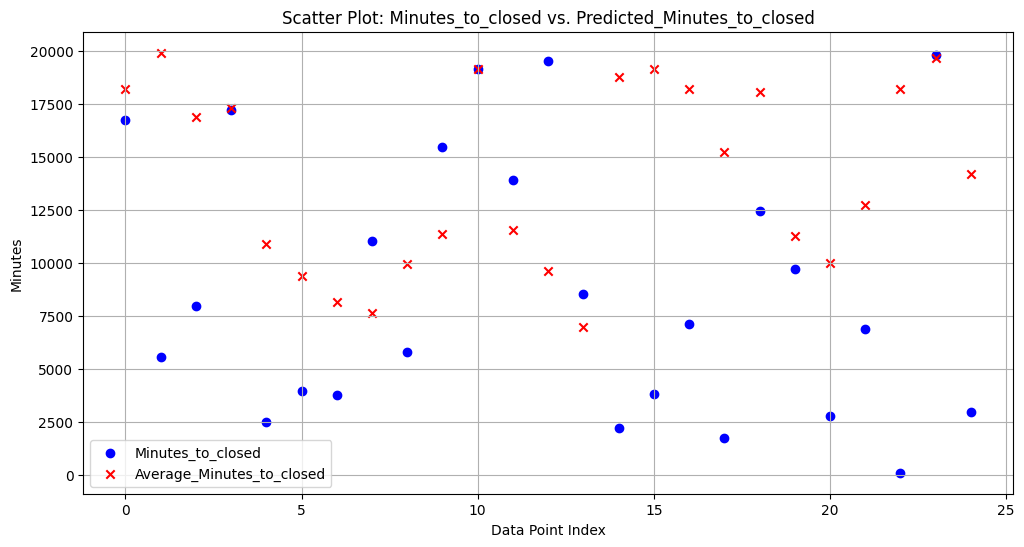

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the 'results_df' DataFrame with 'Minutes_to_closed' and 'Average_Minutes_to_closed'

# Create a scatter plot to visualize both 'Minutes_to_closed' and 'Average_Minutes_to_closed'
plt.figure(figsize=(12, 6))

# Data point indices on the X-axis
x = results_df.index

# Plot 'Minutes_to_closed' for each data point
plt.scatter(x, results_df['Minutes_to_closed'], label='Minutes_to_closed', color='blue', marker='o')

# Plot 'Average_Minutes_to_closed' for each data point
plt.scatter(x, results_df['Average_Minutes_to_closed'], label='Average_Minutes_to_closed', color='red', marker='x')

plt.xlabel('Data Point Index')
plt.ylabel('Minutes')
plt.title('Scatter Plot: Minutes_to_closed vs. Predicted_Minutes_to_closed')
plt.legend()
plt.grid(True)
plt.show()


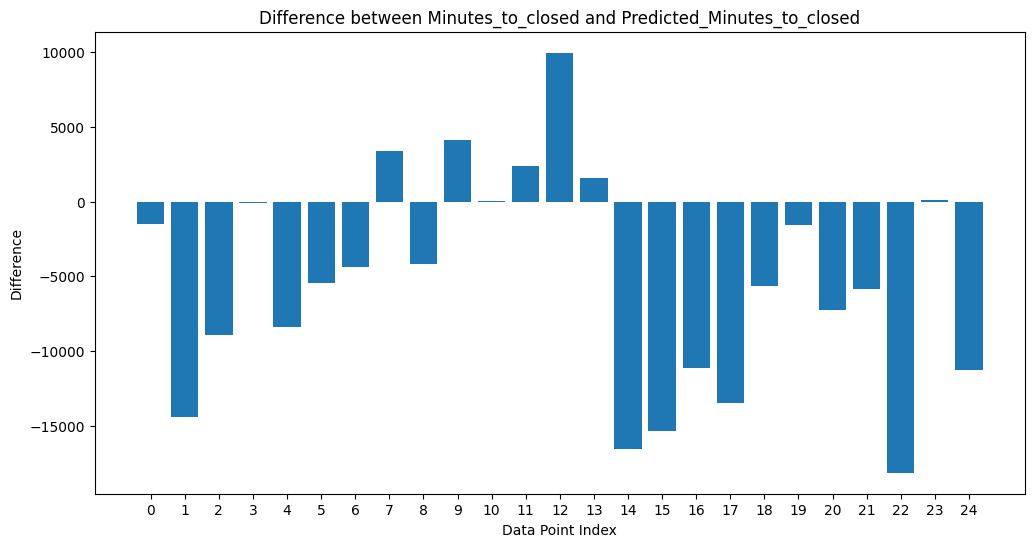

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the 'results_df' DataFrame with 'Minutes_to_closed' and 'Average_Minutes_to_closed'

# Calculate the absolute difference between 'Minutes_to_closed' and 'Average_Minutes_to_closed'
results_df['Difference'] = results_df['Minutes_to_closed'] - results_df['Average_Minutes_to_closed']

# Create a bar chart to visualize the differences
plt.figure(figsize=(12, 6))
plt.bar(results_df.index, results_df['Difference'])
plt.xlabel('Data Point Index')
plt.ylabel('Difference')
plt.title('Difference between Minutes_to_closed and Predicted_Minutes_to_closed')
plt.xticks(results_df.index)
plt.show()


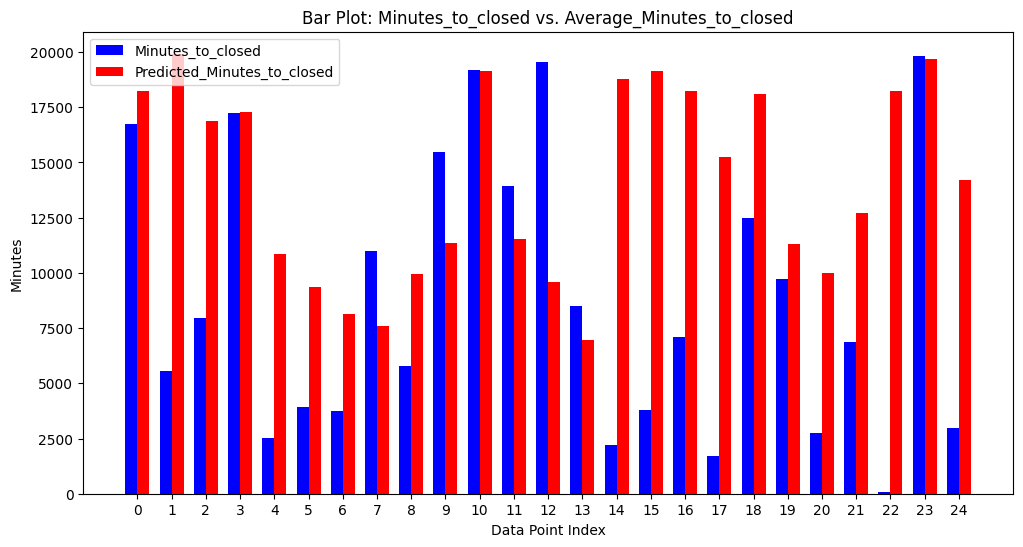

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the 'results_df' DataFrame with 'Minutes_to_closed' and 'Average_Minutes_to_closed'

# Calculate the width of each bar
bar_width = 0.35

# Data point indices on the X-axis
x = results_df.index

# Create a bar plot to visualize both 'Minutes_to_closed' and 'Average_Minutes_to_closed'
plt.figure(figsize=(12, 6))

# Plot 'Minutes_to_closed' for each data point
plt.bar(x - bar_width/2, results_df['Minutes_to_closed'], bar_width, label='Minutes_to_closed', color='blue')

# Plot 'Average_Minutes_to_closed' for each data point
plt.bar(x + bar_width/2, results_df['Average_Minutes_to_closed'], bar_width, label='Predicted_Minutes_to_closed', color='red')

plt.xlabel('Data Point Index')
plt.ylabel('Minutes')
plt.title('Bar Plot: Minutes_to_closed vs. Average_Minutes_to_closed')
plt.xticks(x)
plt.legend()
plt.show()


In [ ]:
pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 106.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 35.9 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=3033f1a86ca2f14d52cc999250588eeb7030a2d42a15d3831663a3b0cc8b1371
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [ ]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Function to calculate cosine similarity between two text descriptions
def calculate_similarity(description1, description2):
    emb1 = model.encode(description1)
    emb2 = model.encode(description2)

    cos_sim = util.cos_sim(emb1, emb2)
    cos_sim = cos_sim[0][0]
    return float(cos_sim)


# Select the first row from the test DataFrame
test_row = X_test.iloc[0]
print(test_row ['Description'],test_row ['Category'] , test_row ['Minutes_to_closed'] )


# Calculate similarity and add it as a new column in the 'top_5_nearest' DataFrame
similarity_scores = []
for index, row in X_train.iterrows():
    similarity_score = calculate_similarity(test_row['Description'], row['Description'])
    similarity_scores.append(similarity_score)


Callers says there are potholes on the 100 blk of Kenmore between Ostrander and Newell Potholes 16740.0


In [ ]:
len(similarity_scores)

1176

In [ ]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, util

# Load a Sentence Transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Assuming you have 'X_train' and 'X_test' DataFrames with 'Description' columns

# Select the first row from the test DataFrame
test_row = X_test.iloc[0]

# Calculate similarity scores between the test description and all training descriptions
similarities = []
for index, row in X_train.iterrows():
    similarity = util.pytorch_cos_sim(model.encode(test_row['Description']), model.encode(row['Description'])).item()
    similarities.append(similarity)

# Combine the similarities with their corresponding 'lat', 'lon', 'Description', 'Category', and 'Minutes_to_closed' from the training data
X_train['Similarity'] = similarities

# Sort the training data by similarity in descending order and select the top 5 highest similarity scores
top_5_similar = X_train.nlargest(5, 'Similarity')[['Lat', 'Lng', 'Description', 'Category', 'Minutes_to_closed']]

# Reset the index of the resulting DataFrame
top_5_similar.reset_index(drop=True, inplace=True)

# Print the top 5 most similar records from the training data
# Calculate the average 'Minutes_to_closed' from the top 5 similar records
average_minutes_to_close = top_5_similar['Minutes_to_closed'].mean()

# Print the average 'Minutes_to_closed' value
print("Average Minutes to Closed for Top 5 Similar Records:", average_minutes_to_close)



Average Minutes to Closed for Top 5 Similar Records: 7122.6


In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util

# Load a Sentence Transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Assuming you have 'X_train' and 'X_test' DataFrames with 'Description' columns

# Create an empty DataFrame to store the results
results_df_sim = pd.DataFrame(columns=['Lat', 'Lng', 'Description', 'Category', 'Minutes_to_closed', 'Average_Minutes_to_closed', 'predicted Minutes_to_closed'])

# Calculate similarity scores and predict 'Minutes_to_closed' for each test point
for index, test_row in X_test.iterrows():
    similarities = []
    for train_index, train_row in X_train.iterrows():
        similarity = util.pytorch_cos_sim(model.encode(test_row['Description']), model.encode(train_row['Description'])).item()
        similarities.append(similarity)

    # Combine the similarities with their corresponding 'lat', 'lon', 'Description', 'Category', and 'Minutes_to_closed' from the training data
    X_train['Similarity'] = similarities

    # Sort the training data by similarity in descending order and select the top 5 highest similarity scores
    top_5_similar = X_train.nlargest(5, 'Similarity')

    # Calculate the average 'Minutes_to_closed' from the top 5 similar records
    average_minutes_to_close = top_5_similar['Minutes_to_closed'].mean()

    # Calculate 'predicted Minutes_to_closed' (you can use any method here)
    predicted_minutes_to_close = average_minutes_to_close

    # Create a new row for the results DataFrame
    results_df_sim = results_df.append({
        'Lat': test_row['Lat'],
        'Lng': test_row['Lng'],
        'Description': test_row['Description'],
        'Category': test_row['Category'],
        'Minutes_to_closed': test_row['Minutes_to_closed'],
        'Average_Minutes_to_closed': average_minutes_to_close,
        'predicted Minutes_to_closed': predicted_minutes_to_close
    }, ignore_index=True)

# Print the results DataFrame
results_df_sim

<ipython-input-41-5cb89ef99209>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_sim = results_df.append({
<ipython-input-41-5cb89ef99209>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_sim = results_df.append({
<ipython-input-41-5cb89ef99209>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_sim = results_df.append({
<ipython-input-41-5cb89ef99209>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_sim = results_df.append({
<ipython-input-41-5cb89ef99209>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

,Lat,Lng,Description,Category,Minutes_to_closed,Average_Minutes_to_closed,Difference,predicted Minutes_to_closed
0,43.015410,-76.152055,Callers says there are potholes on the 100 blk...,Potholes,16740.0,18230.0,-1490.0,NaN
1,43.034298,-76.166638,Location on Malcolm Rd.,Potholes,5537.0,19921.0,-14384.0,NaN
2,43.053909,-76.151323,There is a deep and wide pothole in the road o...,Potholes,7945.0,16890.0,-8945.0,NaN
3,43.057400,-76.104090,potholes near brooklyn pickle,Potholes,17220.0,17304.0,-84.0,NaN
4,43.045381,-76.137767,potholes in crosswalks,Potholes,2503.0,10869.0,-8366.0,NaN
5,43.051660,-76.131705,large pothole under the bridge going towards E...,Potholes,3944.0,9381.0,-5437.0,NaN
6,43.049921,-76.130504,on the road as you enter Associated Medical Pr...,Potholes,3739.0,8138.0,-4399.0,NaN
7,43.054703,-76.188611,Caller says there are potholes at this location,Potholes,11011.0,7609.0,3402.0,NaN
8,43.003041,-76.142516,Potholes going north on Salina when turning of...,Potholes,5799.0,9966.0,-4167.0,NaN
9,43.050369,-76.177756,Multiple potholes on Lakeview,Potholes,15475.0,11367.0,4108.0,NaN


In [ ]:
results_df_sim.columns

Index(['Lat', 'Lng', 'Description', 'Category', 'Minutes_to_closed',
       'Average_Minutes_to_closed', 'Difference',
       'predicted Minutes_to_closed'],
      dtype='object')

In [ ]:
# Remove the 'Difference' and 'predicted Minutes_to_closed' columns from 'results_df'
results_df_sim = results_df_sim.drop(['Difference', 'predicted Minutes_to_closed'], axis=1)



          Lat        Lng                                        Description  \
0   43.015410 -76.152055  Callers says there are potholes on the 100 blk...   
1   43.034298 -76.166638                           Location on Malcolm Rd.    
2   43.053909 -76.151323  There is a deep and wide pothole in the road o...   
3   43.057400 -76.104090                     potholes near brooklyn pickle    
4   43.045381 -76.137767                             potholes in crosswalks   
5   43.051660 -76.131705  large pothole under the bridge going towards E...   
6   43.049921 -76.130504  on the road as you enter Associated Medical Pr...   
7   43.054703 -76.188611    Caller says there are potholes at this location   
8   43.003041 -76.142516  Potholes going north on Salina when turning of...   
9   43.050369 -76.177756                      Multiple potholes on Lakeview   
10  43.056818 -76.146261  i keep call on this is sewer road cut has coll...   
11  43.068266 -76.112306  Per Caller: Pothole on Jam

In [ ]:
results_df_sim

,Lat,Lng,Description,Category,Minutes_to_closed,Average_Minutes_to_closed
0,43.015410,-76.152055,Callers says there are potholes on the 100 blk...,Potholes,16740.0,18230.0
1,43.034298,-76.166638,Location on Malcolm Rd.,Potholes,5537.0,19921.0
2,43.053909,-76.151323,There is a deep and wide pothole in the road o...,Potholes,7945.0,16890.0
3,43.057400,-76.104090,potholes near brooklyn pickle,Potholes,17220.0,17304.0
4,43.045381,-76.137767,potholes in crosswalks,Potholes,2503.0,10869.0
5,43.051660,-76.131705,large pothole under the bridge going towards E...,Potholes,3944.0,9381.0
6,43.049921,-76.130504,on the road as you enter Associated Medical Pr...,Potholes,3739.0,8138.0
7,43.054703,-76.188611,Caller says there are potholes at this location,Potholes,11011.0,7609.0
8,43.003041,-76.142516,Potholes going north on Salina when turning of...,Potholes,5799.0,9966.0
9,43.050369,-76.177756,Multiple potholes on Lakeview,Potholes,15475.0,11367.0


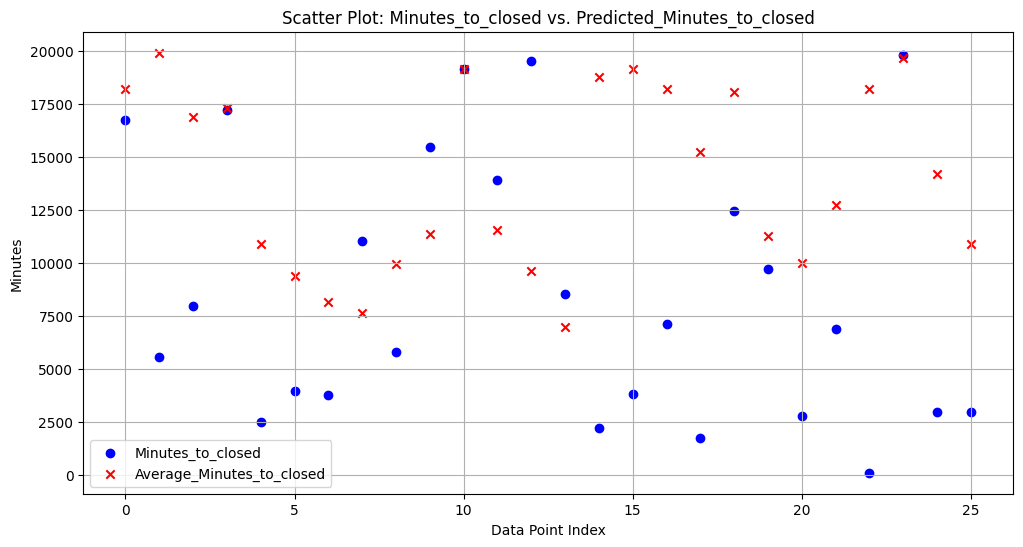

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the 'results_df' DataFrame with 'Minutes_to_closed' and 'Average_Minutes_to_closed'

# Create a scatter plot to visualize both 'Minutes_to_closed' and 'Average_Minutes_to_closed'
plt.figure(figsize=(12, 6))

# Data point indices on the X-axis
x = results_df_sim.index

# Plot 'Minutes_to_closed' for each data point
plt.scatter(x, results_df_sim['Minutes_to_closed'], label='Minutes_to_closed', color='blue', marker='o')

# Plot 'Average_Minutes_to_closed' for each data point
plt.scatter(x, results_df_sim['Average_Minutes_to_closed'], label='Average_Minutes_to_closed', color='red', marker='x')

plt.xlabel('Data Point Index')
plt.ylabel('Minutes')
plt.title('Scatter Plot: Minutes_to_closed vs. Predicted_Minutes_to_closed')
plt.legend()
plt.grid(True)
plt.show()


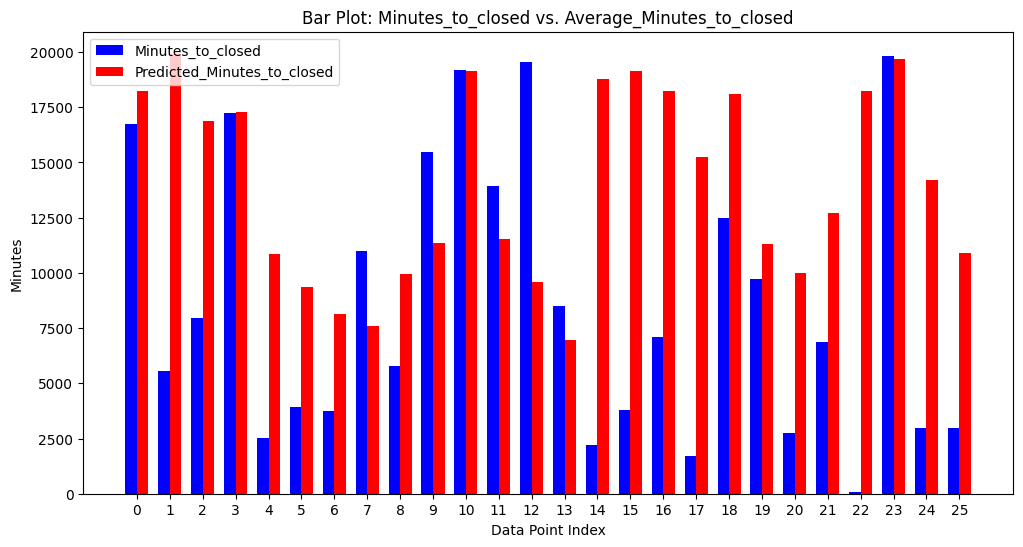

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the 'results_df' DataFrame with 'Minutes_to_closed' and 'Average_Minutes_to_closed'

# Calculate the width of each bar
bar_width = 0.35

# Data point indices on the X-axis
x = results_df_sim.index

# Create a bar plot to visualize both 'Minutes_to_closed' and 'Average_Minutes_to_closed'
plt.figure(figsize=(12, 6))

# Plot 'Minutes_to_closed' for each data point
plt.bar(x - bar_width/2, results_df_sim['Minutes_to_closed'], bar_width, label='Minutes_to_closed', color='blue')

# Plot 'Average_Minutes_to_closed' for each data point
plt.bar(x + bar_width/2, results_df_sim['Average_Minutes_to_closed'], bar_width, label='Predicted_Minutes_to_closed', color='red')

plt.xlabel('Data Point Index')
plt.ylabel('Minutes')
plt.title('Bar Plot: Minutes_to_closed vs. Average_Minutes_to_closed')
plt.xticks(x)
plt.legend()
plt.show()
